# Tarea 8 Feature engineering

### Abraham Nieto 51556 y Ricardo Lastra 160167

#### 18 de noviembre de 2017

In [1]:
from utils import *

In [3]:
from numpy import *
import scipy as sp
from pandas import *
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import pandas.rpy.common as com

#### Ejercicios:

1. Realizar los siguientes 4 metodos en R y Python.
2. Agrega estos archivos en git en la carpeta alumnos/tu_carpeta/tarea_8/
3. Ocupa el set de datos mtcars para probar tu método
4. Puedes validar tus métodos con los que ya están implementados en scikit-learn -pero no les hagas wrap!-


In [4]:
ro.r('data(mtcars)')

'mtcars'


In [5]:
cars = com.load_data('mtcars')

In [6]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


**Tarea 8/ejercicio 1**

Implementa el método low_variability() en un archivo utils.R
Implementa el método low_variability() en un archivo utils.py
Agrega estos archivos en git en la carpeta alumnos/tu_carpeta/tarea_8/
Ocupa el set de datos mtcars para probar tu método
Puedes validar tus métodos con los que ya están implementados en scikit-learn -pero no les hagas wrap!-

se elimina: drat
se elimina: vs
se elimina: am
se elimina: gear


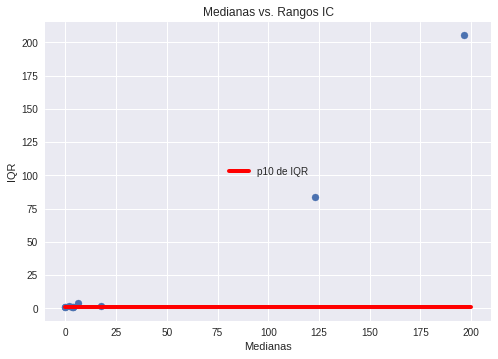

corte IQR percentil 10 0.984


In [7]:
low_variability(cars,1.01,'mpg') #utilizamos el percentil 10 del IQR para cortar

In [8]:
#se elimina(n) la(s) variable(s) que faltan mencionan del dataframe
cars.head()

,mpg,cyl,disp,hp,wt,qsec,carb
Mazda RX4,21.0,6.0,160.0,110.0,2.620,16.46,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,2.875,17.02,4.0
Datsun 710,22.8,4.0,108.0,93.0,2.320,18.61,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.215,19.44,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.440,17.02,2.0


In [9]:
#validando con sklearn...
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(.55)
selector.fit_transform(cars)[0:5,:]
#la función en sklearn usa la varianza en vez de un rangointercuartílico, entonces usamos la varianza
#equivalente de nuestros datos y vemos que elimina las mismas variables.

array([[  21.   ,    6.   ,  160.   ,  110.   ,    2.62 ,   16.46 ,    4.   ],
       [  21.   ,    6.   ,  160.   ,  110.   ,    2.875,   17.02 ,    4.   ],
       [  22.8  ,    4.   ,  108.   ,   93.   ,    2.32 ,   18.61 ,    1.   ],
       [  21.4  ,    6.   ,  258.   ,  110.   ,    3.215,   19.44 ,    1.   ],
       [  18.7  ,    8.   ,  360.   ,  175.   ,    3.44 ,   17.02 ,    2.   ]])

**Tarea 8/ejercicio 2**

Implementa el método correlation_filtering() en el archivo utils.R
Implementa el método correlation_filtering() en el archivo utils.py
Ocupa el data set de mtcars para probar tu método

In [10]:
cars = com.load_data('mtcars')#volvemos a cargar dado que en el ejercicio anterior borramos unas variables

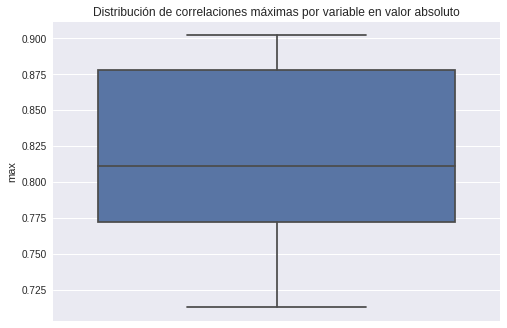

cyl disp
elimina disp
disp cyl
elimina disp
wt disp
elimina disp


In [11]:
bye=correlation_filtering(cars,'mpg',0.875)#correlación alta=|.875|

In [12]:
#se eliminan:
bye

['disp']

**Tarea 8/ejercicio 3**

Implementa el método FCB_filtering() en el archivo utils.R
Implementa el método FCB_filtering() en el archivo utils.py
Ocupa el data set de mtcars para probar tu método

/home/abraham/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


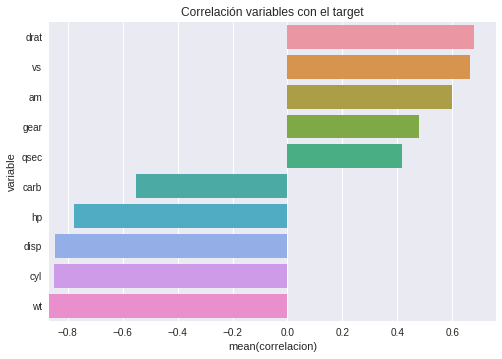

 tira  Index(['cyl', 'disp', 'drat'], dtype='object')
  variable  correlacion    abscor
4       wt    -0.867659  0.867659
0      cyl    -0.852162  0.852162
1     disp    -0.847551  0.847551
2       hp    -0.776168  0.776168


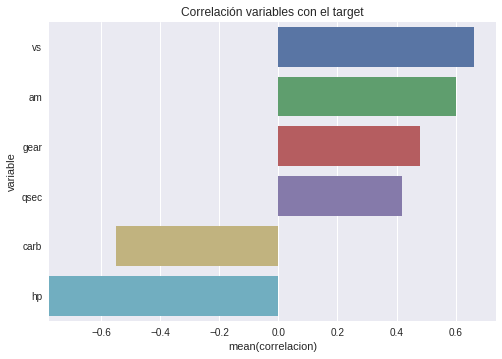

 tira  Index(['qsec', 'vs', 'carb'], dtype='object')
  variable  correlacion    abscor
0       hp    -0.776168  0.776168


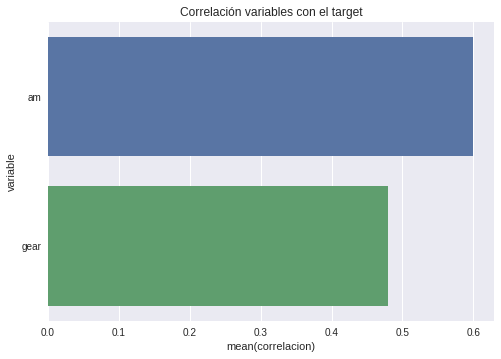

In [13]:
bye2=FCB_filtering(cars,.7,'mpg')#usamos umbral .7 paa definir alta correlación con el target y entre las
#variables

In [14]:
#las variables a conservar es:
cars[bye2].head()

,wt,hp,mpg,am,gear
Mazda RX4,2.620,110.0,21.0,1.0,4.0
Mazda RX4 Wag,2.875,110.0,21.0,1.0,4.0
Datsun 710,2.320,93.0,22.8,1.0,4.0
Hornet 4 Drive,3.215,110.0,21.4,0.0,3.0
Hornet Sportabout,3.440,175.0,18.7,0.0,3.0


**Tarea 8/ejercicio 4**

Implementa el método forward_filtering() en utils.R
Implementa el método forward_filtering() en utils.py
Utiliza el data set de mtcars para probar tus métodos

In [15]:
#creamos la lista de variables independientes
features=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
#aplicamos la funcion forward
keep=forward_filtering(cars,'mpg',features)#estas variables nos vamos a quedar!

-inf
['wt']
91.3753250038
0.75
0.75
['wt', 'cyl']
70.908360538
0.83
0.83
['wt', 'cyl', 'hp']
50.1714950873
0.84
0.84
['wt', 'cyl', 'hp', 'am']
37.9612838698
0.85
0.85
['wt', 'cyl', 'hp', 'am', 'qsec']
31.4383284928
0.86
0.86
['wt', 'cyl', 'hp', 'am', 'qsec', 'disp']
26.9071043425
0.87
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     26.91
Date:                lun, 20 nov 2017   Prob (F-statistic):           9.29e-10
Time:                        12:38:35   Log-Likelihood:                -70.230
No. Observations:                  32   AIC:                             154.5
Df Residuals:                      25   BIC:                             164.7
Df Model:                           6                                         
Cov

In [16]:
print('variables son',keep)
cars[keep+['mpg']].head()#asi queda nuestra tabla

variables son ['wt', 'cyl', 'hp', 'am', 'qsec', 'disp']


,wt,cyl,hp,am,qsec,disp,mpg
Mazda RX4,2.620,6.0,110.0,1.0,16.46,160.0,21.0
Mazda RX4 Wag,2.875,6.0,110.0,1.0,17.02,160.0,21.0
Datsun 710,2.320,4.0,93.0,1.0,18.61,108.0,22.8
Hornet 4 Drive,3.215,6.0,110.0,0.0,19.44,258.0,21.4
Hornet Sportabout,3.440,8.0,175.0,0.0,17.02,360.0,18.7
